Train accuracy: 93.19%
Test accuracy: 88.17%
Precision: 87.86%
Recall: 88.17%
F1 Score: 87.48%
The predicted class for the image is: Apple_Bad


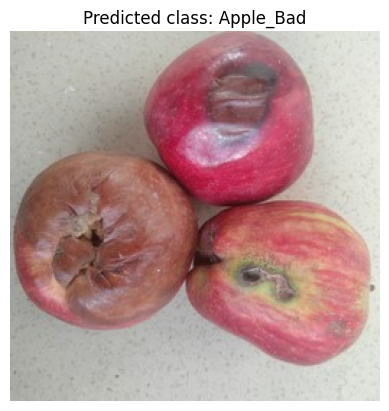

In [4]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Set paths
data_dir = r'C:\Users\USER\Desktop\Rucha\dataset'

# Function to extract features from an image
def extract_features(image, img_size=128):
    # Resize image
    image = cv2.resize(image, (img_size, img_size))
    
    # Extract color histogram (normalized)
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    
    # Convert image to grayscale for HOG
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Extract HOG features
    hog_features, hog_image = hog(gray_image, pixels_per_cell=(8, 8), cells_per_block=(2, 2),
                                  visualize=True, feature_vector=True)
    
    # Extract mean color
    mean_color = cv2.mean(image)[:3]  # Ignore the alpha channel if present
    
    # Combine all features
    features = np.hstack([hist, hog_features, mean_color])
    
    return features

# Function to load and preprocess data
def load_data(data_dir, img_size=128):
    data = []
    labels = []
    for root, dirs, files in os.walk(data_dir):
        for dir_name in dirs:
            category_path = os.path.join(root, dir_name)
            label = dir_name  # Folder name used as label
            for img in os.listdir(category_path):
                try:
                    img_path = os.path.join(category_path, img)
                    img_array = cv2.imread(img_path, cv2.IMREAD_COLOR)
                    if img_array is not None:
                        features = extract_features(img_array, img_size)
                        data.append(features)
                        labels.append(label)
                    else:
                        print(f"Warning: Failed to load image {img_path}")
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")
    return np.array(data), np.array(labels)

# Load data
X, labels = load_data(data_dir)

# Check if data is loaded correctly
if len(X) == 0 or len(labels) == 0:
    raise ValueError("No data found. Please check the data directory and ensure it contains images.")

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluate the model on training data
y_train_pred = knn.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train accuracy: {train_accuracy*100:.2f}%')

# Evaluate the model on testing data
y_test_pred = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f'Test accuracy: {test_accuracy*100:.2f}%')
print(f'Precision: {precision*100:.2f}%')
print(f'Recall: {recall*100:.2f}%')
print(f'F1 Score: {f1*100:.2f}%')



The predicted class for the image is: Apple_Bad using KNN


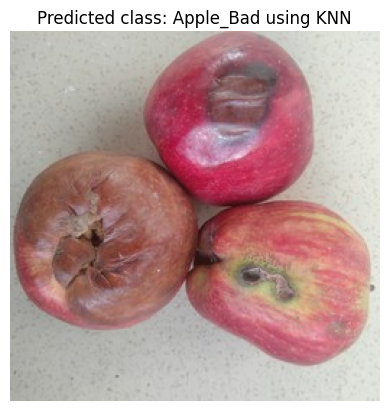

In [6]:
# Function to predict the class of a new sample image and display it
def predict_sample_image(image_path, knn_model, label_encoder, img_size=128):
    img_array = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if img_array is None:
        print(f"Error: Unable to load image at {image_path}")
        return
    
    features = extract_features(img_array, img_size)
    features = np.array(features).reshape(1, -1)  # Reshape for prediction
    
    prediction = knn_model.predict(features)
    predicted_label = label_encoder.inverse_transform(prediction)
    
    print(f"The predicted class for the image is: {predicted_label[0]} using KNN")
    
    # Display the image with its predicted class
    plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
    plt.title(f'Predicted class: {predicted_label[0]} using KNN')
    plt.axis('off')
    plt.show()

# Test with a sample image
sample_image_path = r"C:\Users\USER\Desktop\Rucha\dataset\Apple_Bad\IMG_20190910_172802_1.jpg"
predict_sample_image(sample_image_path, knn, label_encoder)
